<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Knowledge_Graph_Research/blob/main/AA_KG_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Setup

In [1]:
import os
import sys
import string
import random
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

from google.colab import drive

In [2]:
# Place the dataset in your Google Drive 
drive.mount('/content/drive')

# set dataset path
folder_name = 'aa_kg_research/test/AA Knowledge Graphs Project.csv' #@param{type:"string"}
path = '/content/drive/My Drive/' + folder_name 

Mounted at /content/drive


## Process portfolio data

In [3]:
# read csv file
df = pd.read_csv(path)
df.head(-1)

,Unnamed: 0,Project title,Key words,Project authors
0,0,The Impact of Green Roofs on Urban Heat Island...,"green roofs,urban heat island effect,urban env...","John Smith, Emily Johnson, Rachel Williams, Mi..."
1,1,Sustainable Urbanism: An Analysis of LEED-Cert...,"sustainable urbanism,LEED certification,neighb...","Jessica Davis, Robert Anderson, William Thomps..."
2,2,The Role of Public Space in Promoting Social C...,"public space,social cohesion,urban design","David Taylor, James Martin, Mary Wilson, Chris..."
3,3,The Future of Transportation: A Case Study of ...,"electric vehicles,autonomous vehicles,urban tr...","Matthew Anderson, Elizabeth Thompson, Richard ..."
4,4,The Relationship Between Urban Form and Walkin...,"urban form,walking behavior,pedestrian environ...","Susan Johnson, Mark Williams, Joseph Thompson,..."
5,5,The Effects of Urban Density on Mental Health,"urban density,mental health,residential design","William Anderson, David Taylor, Jennifer Brown..."
6,6,The Impact of Urban Sprawl on Biodiversity,"urban sprawl,biodiversity,ecological impacts","Robert Smith, Rachel Martin, John Davis, Micha..."
7,7,The Role of Public Art in Urban Revitalization,"public art,urban revitalization,neighborhood i...","Elizabeth Jones, William Thompson, Mark Anders..."
8,8,The Role of Transportation Infrastructure in S...,"transportation infrastructure,urban form,land ...","Christopher Taylor, James Davis, Sarah Wilson,..."
9,9,Evaluating the Effectiveness of Public Transit...,"public transit,transit-oriented development,su...","Matthew Taylor, Susan Brown, John Thompson, Ch..."


In [4]:
# create empty list
split_list = []

# iterate through cells in second column
for cell in df["Project authors"]:       
    split_list.append(cell.split(',')) # split string in cell with ',' and append to list

# print(split_list)
print(split_list[0])
print(split_list[0][0])

['John Smith', ' Emily Johnson', ' Rachel Williams', ' Michael Brown']
John Smith


## Checking correlations

In [5]:
# add nodes
nodes = []

for cell in df["Project title"]:       
    nodes.append(cell)      

print(nodes)

['The Impact of Green Roofs on Urban Heat Island Effect', 'Sustainable Urbanism: An Analysis of LEED-Certified Neighborhoods', 'The Role of Public Space in Promoting Social Cohesion in Cities', 'The Future of Transportation: A Case Study of Electric, Autonomous Vehicles in Urban Areas', 'The Relationship Between Urban Form and Walking Behavior', 'The Effects of Urban Density on Mental Health', 'The Impact of Urban Sprawl on Biodiversity', 'The Role of Public Art in Urban Revitalization', 'The Role of Transportation Infrastructure in Shaping Urban Form', 'Evaluating the Effectiveness of Public Transit-Oriented Development', 'The Impact of Street Design on Pedestrian Safety', 'The Use of Green Infrastructure to Manage Stormwater in Urban Areas', 'The Relationship Between Housing Affordability and Access to Public Transportation', 'The Role of Public Parks in Promoting Physical Activity in Urban Areas', 'The Impact of Light Pollution on Urban Ecosystems', 'The Role of Public Transportatio

In [6]:
edge_labels = []

# Check if two works involve same author(s)
def add_edge(cell_1, cell_2):
  for item_1 in split_list[cell_1]:
    for item_2 in split_list[cell_2]:
        if cell_1 != cell_2 and item_1 == item_2:
           edge_labels.append(str(cell_1)+'-'+str(cell_2))

In [7]:
# Test every pair of works 
for i in range(len(df["Project authors"])): # Work A
    for j in range(len(df["Project authors"])): # Work B
        add_edge(i, j) 

print(edge_labels)

['0-12', '1-7', '1-16', '1-19', '3-18', '5-17', '6-18', '7-1', '7-19', '7-19', '7-19', '8-14', '9-15', '9-15', '9-15', '10-13', '10-16', '12-0', '12-18', '13-10', '14-8', '15-9', '15-9', '15-9', '16-1', '16-10', '17-5', '18-3', '18-6', '18-12', '19-1', '19-7', '19-7', '19-7']


## Set up knowledge graph

In [8]:
# Create an empty graph
G = nx.Graph()

# Add some nodes to the graph (test)
for node in nodes:
    G.add_node(node)

In [9]:
# Get edge ends
edge_ends = []

for pair in edge_labels:
    edge_ends.append(pair.split('-'))

print(edge_ends)

# Add edges
for end in edge_ends:
    G.add_edge(nodes[int(end[0])], nodes[int(end[1])])

[['0', '12'], ['1', '7'], ['1', '16'], ['1', '19'], ['3', '18'], ['5', '17'], ['6', '18'], ['7', '1'], ['7', '19'], ['7', '19'], ['7', '19'], ['8', '14'], ['9', '15'], ['9', '15'], ['9', '15'], ['10', '13'], ['10', '16'], ['12', '0'], ['12', '18'], ['13', '10'], ['14', '8'], ['15', '9'], ['15', '9'], ['15', '9'], ['16', '1'], ['16', '10'], ['17', '5'], ['18', '3'], ['18', '6'], ['18', '12'], ['19', '1'], ['19', '7'], ['19', '7'], ['19', '7']]


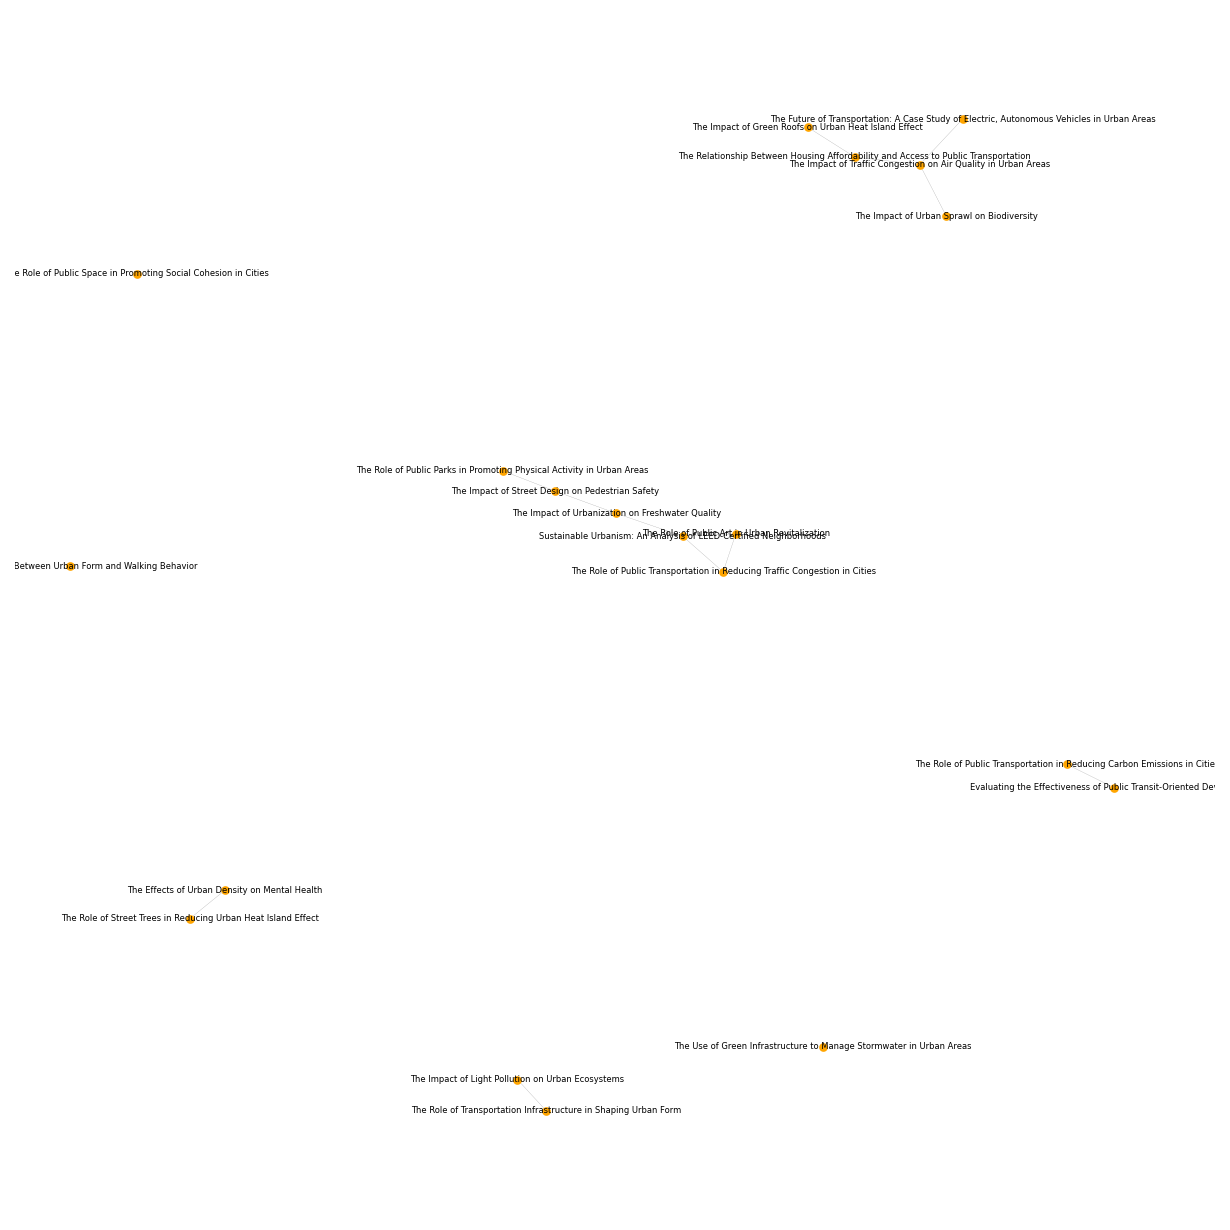

In [10]:
plt.figure(figsize=(8, 8), dpi=150)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=4, node_size=10, node_color="orange", width=0.1, edge_color="grey")
plt.show()

### Test

In [11]:

# Create an empty graph
G_test = nx.Graph()

# Produce fake data #------------------------
# Add some nodes to the graph (test)
people = []
for i in range(32):
    name = "".join(random.choices(string.ascii_uppercase, k=5))
    people.append(name)
    G_test.add_node(name)

# Add some edges to the graph (test)
for i in range(len(people)):
    for j in range(i+1, len(people)):
        if set(people[i]) & set(people[j]):
            G_test.add_edge(people[i], people[j])
          

## Visualise knowledge graph

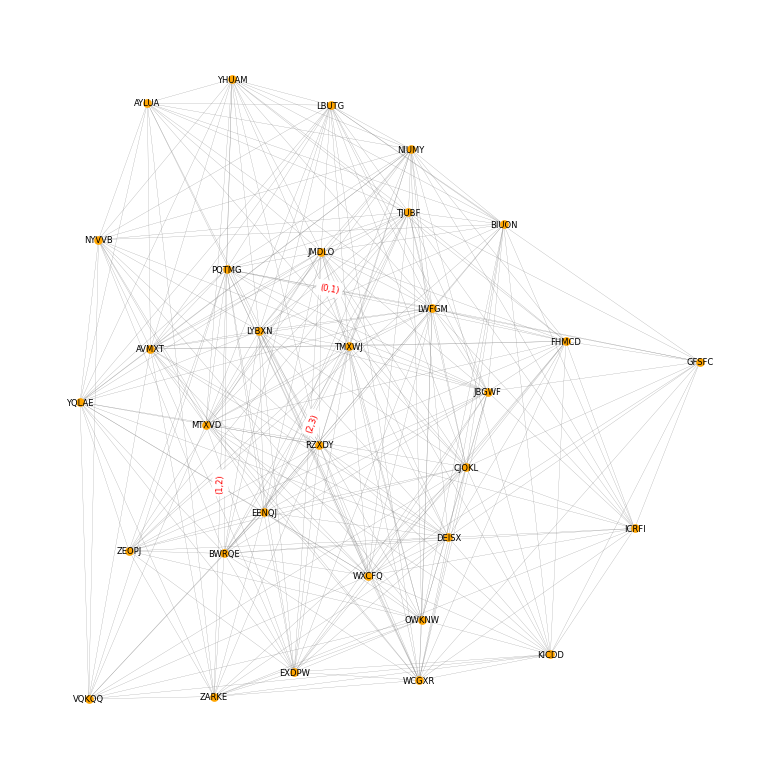

In [12]:

# Visualise the graph
plt.figure(figsize=(5, 5), dpi=150)
pos = nx.spring_layout(G_test)
nx.draw(G_test, pos, with_labels=True, font_size=4, node_size=10, node_color="orange", width=0.1, edge_color="grey")


# Add edge labels (test)
nx.draw_networkx_edge_labels(
    G_test, pos,
    edge_labels={(people[0], people[1]): '(0,1)', 
                 (people[1], people[2]): '(1,2)', 
                 (people[2], people[3]): '(2,3)'},
    font_color='red',
    font_size=4
)

plt.show()
